![alt text](FGV_logo.png)

# Machine Learning

### Classificação não supervisionada. K-means

In [1]:
from IPython.display import Image 
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/197px-K_Means_Example_Step_1.svg.png')

In [2]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/197px-K_Means_Example_Step_2.svg.png')

In [3]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/197px-K_Means_Example_Step_3.svg.png')

In [4]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/197px-K_Means_Example_Step_4.svg.png')

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [6]:
# Criando datasets
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, random_state=8, cluster_std=2.4)

In [7]:
def plot_blobs(um_X, um_classificador=None):
    x_min, x_max = um_X[:, 0].min() - 2, um_X[:, 0].max() + 2
    y_min, y_max = um_X[:, 1].min() - 2, um_X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

    plt.figure(1)
    plt.clf()
    
    plt.plot(um_X[:, 0], um_X[:, 1], 'k.', markersize=10, alpha = 0.5)
    
    if um_classificador:
        Z = um_classificador.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   cmap=plt.cm.Paired,
                   aspect='auto', origin='lower')

        centroids = um_classificador.cluster_centers_
        inert = um_classificador.inertia_
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3, color='w', zorder=8)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

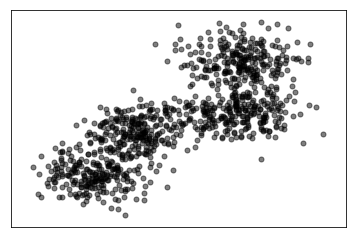

In [8]:
plot_blobs(X)

In [9]:
k_means = KMeans(n_clusters=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

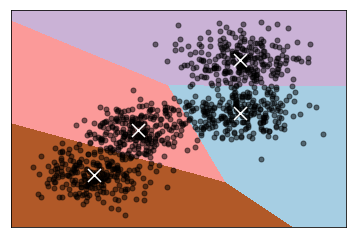

In [10]:
plot_blobs(X, k_means)

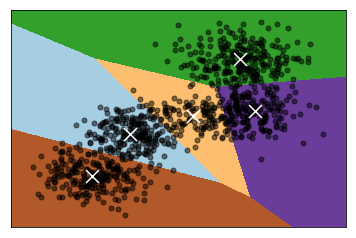

In [11]:
k_means = KMeans(n_clusters=5)
k_means.fit(X)
plot_blobs(X, k_means)

### Exemplo real

In [12]:
import pandas as pd
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

data = pd.read_csv('household_power_consumption.txt', delimiter=';')
power_consumption = data.iloc[0:, 2:9].dropna()
pc_toarray = power_consumption.values
hpc_fit, hpc_fit1 = train_test_split(pc_toarray, train_size=.01)
power_consumption.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [13]:
hpc_fit.shape

(20492, 7)

In [14]:
%pylab inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

hpc = PCA(n_components=2).fit_transform(hpc_fit)
k_means = KMeans()
k_means.fit(hpc)

Populating the interactive namespace from numpy and matplotlib


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

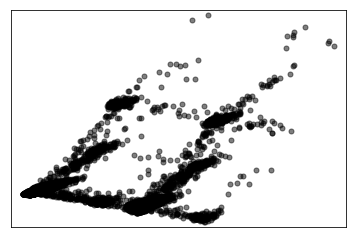

In [15]:
plot_blobs(hpc)

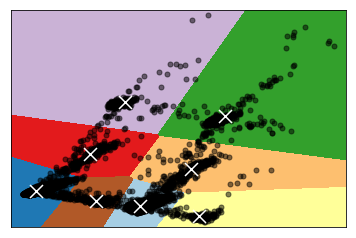

In [16]:
plot_blobs(hpc, k_means)

### metricas para clustering
K-means é um algoritmo onde necessitamos que o numero de cluster $k$ seja passado como parametro.<br>
Como obter o melhor $k$? Aquele que: 

* mantenha observações próximas no mesmo cluster (dificil se $k$ baixo) 
* evite criar clusters muito similares (tipico quando $k$ alto) 

#### Determinando k pelo metodo Elbow (Elbow method)

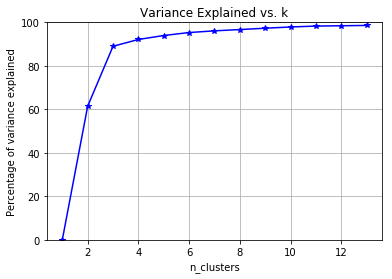

In [17]:
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt

# Determine your k range
k_range = range(1,14)

# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(n_clusters=k).fit(hpc) for k in k_range]

# Pull out the cluster centers for each model
centroids = [X.cluster_centers_ for X in k_means_var]

# Calculate the Euclidean distance from 
# each point to each cluster center
k_euclid = [cdist(hpc, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis=1) for ke in k_euclid]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

# The total sum of squares
tss = sum(pdist(hpc)**2)/hpc.shape[0]

# The between-cluster sum of squares
bss = tss - wcss

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs. k')

#### Determinando k pelo silhouette score

In [18]:
from sklearn.metrics import silhouette_score

labels = k_means.labels_
silhouette_score(hpc, labels, metric='euclidean')

0.81002780381893458

In [19]:
hpc

array([[ -6.54606791,   1.29957228],
       [  2.47181337,  12.99220871],
       [ -6.53364831,   0.13752194],
       ..., 
       [  9.42390807,  -5.22071409],
       [ -5.41634887,   1.33783743],
       [ -7.04916237,  -0.18956988]])

In [20]:
hpc_sample = hpc[np.random.choice(len(hpc), size = 2000, replace = False)]

For n_clusters = 2 The average silhouette_score is : 0.773837806168


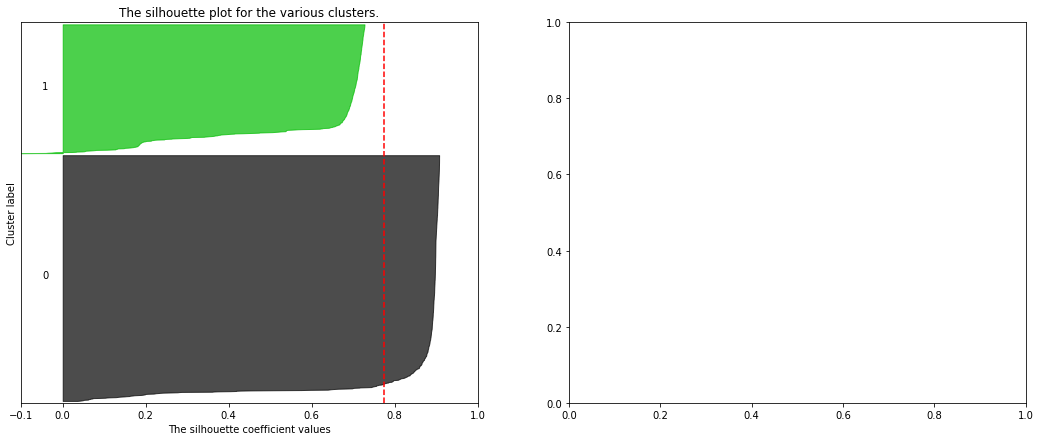

For n_clusters = 3 The average silhouette_score is : 0.849546961796


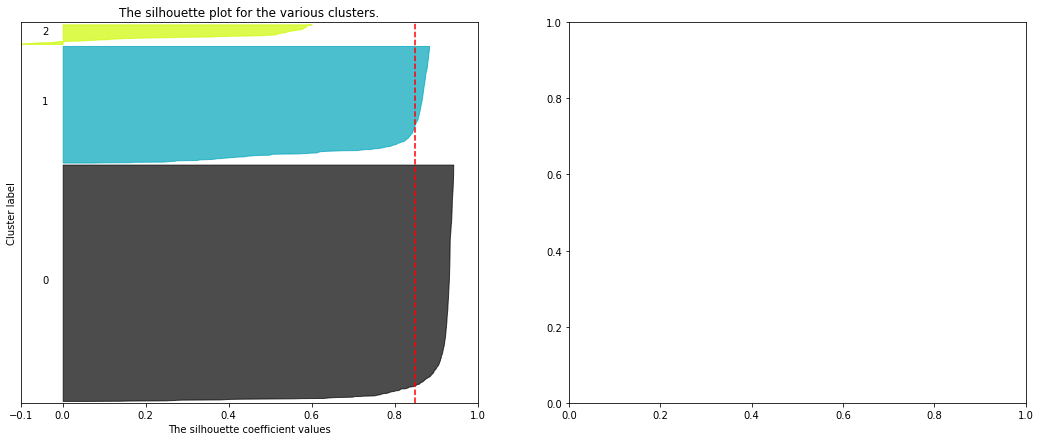

For n_clusters = 4 The average silhouette_score is : 0.853921060963


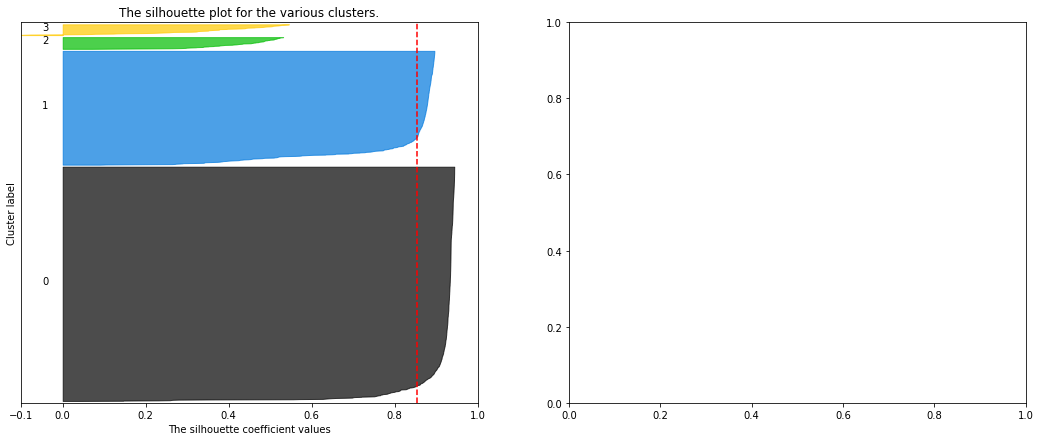

For n_clusters = 5 The average silhouette_score is : 0.854937222337


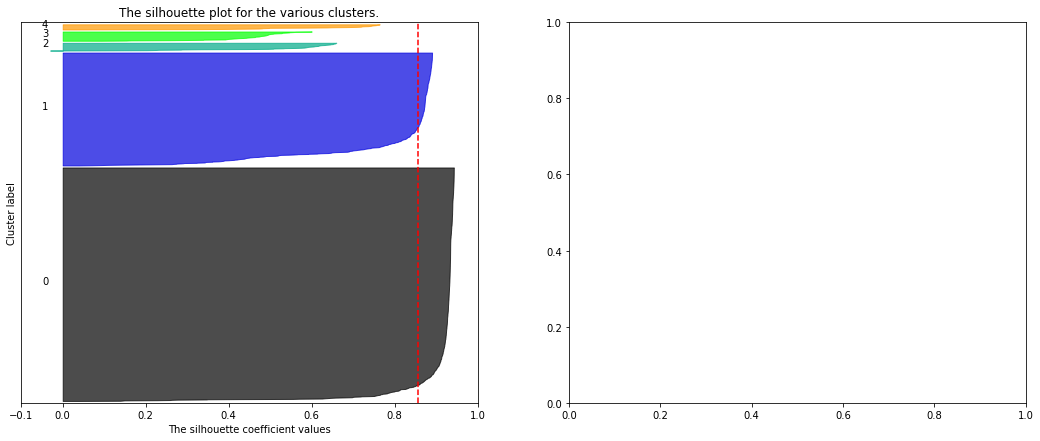

In [21]:


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5]
X = hpc_sample

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

    plt.show()